# 1. 手書き数字の判断（機械学習）

## 1-2. 手書き数字のデータセットを利用してみる

* データセットの読み込み

In [27]:
# scikit-learnからインポート
from sklearn.datasets import load_digits
# データセットを読み込み
digits = load_digits()

In [28]:
# 表示して確認
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

* 確認

In [29]:
# 画像データ（1次元）のサイズ
print(digits.data.shape)
# 最初のデータ
print(digits.data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [30]:
# ターゲットのサイズ
print(digits.target.shape)
# 最初のラベル
print(digits.target[0])

(1797,)
0


In [31]:
# 画像データ（2次元）のサイズ
print(digits.images.shape)
# 最初のデータ
print(digits.images[0])

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


画像としての表示

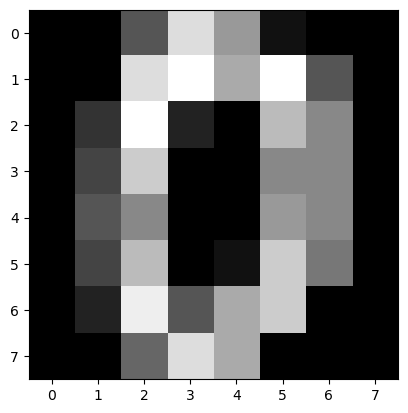

In [32]:
# 2次元の画像データ（digits.images[0]）を画像として表示
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap="gray")
plt.show()

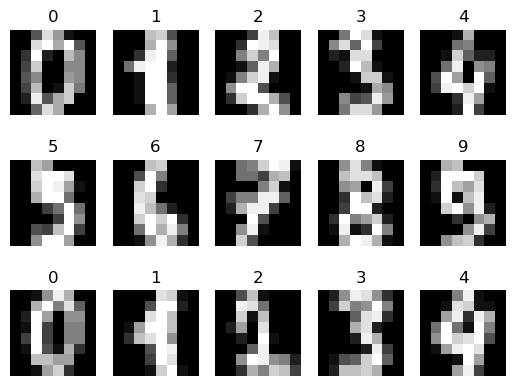

In [33]:
# 15個の数字画像を描画するループを回す
for i in range(15):
    # 3x5のグリッドのi+1番目の場所にプロットする
    plt.subplot(3,5,i+1)
    # 軸を非表示にする
    plt.axis("off")
    # タイトルにi番目の画像のラベル（答え）を表示する
    plt.title(str(digits.target[i]))
    # i番目の画像をグレースケールで表示する
    plt.imshow(digits.images[i] , cmap="gray")

# 描画する
plt.show()

## 1-3. 手書き数字を判断する機械学習モデルの作成

1. データセットの準備

In [34]:
# コードの例
from sklearn.datasets import load_digits
digits = load_digits()

2. 入力と出力に分割

In [35]:
# コードの例
x = digits.data
t = digits.target

3. 訓練用とテスト用に分割

In [36]:
# コードの例
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=2230033, stratify=t) 

4. 学習

In [37]:
# コードの例
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, t_train) 

SVC()

5. 評価

In [38]:
# コードの例
print("train score:", model.score(x_train, t_train))
print("test score:", model.score(x_test, t_test))

train score: 0.9944328462073765
test score: 0.9861111111111112


6. モデルの保存

In [39]:
# コードの例
import joblib
joblib.dump(model, 'digits.pkl') # モデル変数、ファイルパスを指定

['digits.pkl']

## 1-4. 新しい画像に対する予測

1. ファイルの読み込み

In [15]:
# 画像を読み込んで前処理をする
import cv2
target_filename = '2.png'
target_image = cv2.imread(target_filename)  # ファイル名を指定画像を読み込む

2. データを学習時のものと合わせる

In [16]:
# 読み込んだ画像をグレースケールに変換する
target_image = cv2.cvtColor(target_image,cv2.COLOR_BGR2GRAY)

In [17]:
# cv2.resize()関数を使って画像サイズを8x8にリサイズする
target_image = cv2.resize(target_image,(8,8))
print(target_image) #表示して確認

[[255 255 255 255 255 255 255 255]
 [255 255  75  65  63 255 255 255]
 [255 255 158 255 255  63 255 255]
 [255 255 255 255  34  86 255 255]
 [255 255 255  31 106 255 255 255]
 [255 255  31 227 255 255 255 255]
 [255 255  34  35  31  41  72 255]
 [255 255 255 255 255 255 255 255]]


In [18]:
# 白黒反転し、値の変更
target_image = 15 - target_image // 16  # 白黒反転して、0~15の範囲に調整する
print(target_image)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0 11 11 12  0  0  0]
 [ 0  0  6  0  0 12  0  0]
 [ 0  0  0  0 13 10  0  0]
 [ 0  0  0 14  9  0  0  0]
 [ 0  0 14  1  0  0  0  0]
 [ 0  0 13 13 14 13 11  0]
 [ 0  0  0  0  0  0  0  0]]


In [19]:
# 1次元にする
target_image = target_image.reshape(-1, 64)
print(target_image)

[[ 0  0  0  0  0  0  0  0  0  0 11 11 12  0  0  0  0  0  6  0  0 12  0  0
   0  0  0  0 13 10  0  0  0  0  0 14  9  0  0  0  0  0 14  1  0  0  0  0
   0  0 13 13 14 13 11  0  0  0  0  0  0  0  0  0]]


3. 機械学習に入れて予測する

In [20]:
# 保存したモデルのファイルからモデルを読み込む
import joblib
model = joblib.load('digits.pkl')
res = model.predict(target_image)
print(f"{target_filename}は、数字の{res[0]}ですね。")

2.pngは、数字の2ですね。


# 2. 輪郭検出（OpenCV）

## 2-2. はがきの輪郭検出

輪郭を抽出する関数（配布・記入済み）

**実行してください**

In [21]:
# OpenCVとMatplotlibのインポート
import cv2
import matplotlib.pyplot as plt

# 画像から郵便番号の領域を検出する関数の定義
def detect_postcode(fname):
    
    # 画像の読み込み
    img = cv2.imread(fname)

    # 画像の高さと幅を取得し、高さと横幅を切り取る
    h, w = img.shape[:2]        # 高さと幅を取得 (高さ、幅、チャンネル)の2つ目までという意味
    img = img[0:h//2, w//3:]    # 高さを0から1/2までに 横幅を1/3から端までに切り取る

    # グレースケール変換、ガウシアンフィルタリング、二値化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # グレースケール変換
    gray = cv2.GaussianBlur(gray, (3, 3), 0)        # ガウシアンフィルタでぼかし処理
    img2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]   # 二値化処理

    # 輪郭の検出
    cnts = cv2.findContours(img2,        # 画像
        cv2.RETR_LIST,                  # 全ての輪郭を摘出
        cv2.CHAIN_APPROX_SIMPLE)[0]     # 必要な点だけ摘出

    # 検出された輪郭の中から特定の幅のものを抽出し、座標を取得
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)   # 各輪郭のx座標、y座標,横幅,縦幅を取得
        if not(50 < w < 70): continue       # 横幅が50以下または70以上の場合は何もしない
        result.append([x, y, w, h])         # 結果用のリストに輪郭情報を追加

    # 抽出した座標に矩形を描画
    for x, y, w, h in result:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # 抽出した輪郭を左側から並ぶようソート
    result = sorted(result,key=lambda x:x[0])
    
		# ソートされた座標の中から隣り合う座標間の距離が一定以上のものを抽出
    result2 = []
    if result:    #  resultが空でない場合のみ処理を行う
        lastx = result[0][0]  # 最初のx座標で初期化
        result2.append(result[0])  # 最初の要素を追加
        for x, y, w, h in result[1:]:  # 最初の要素をスキップ
            if x - lastx >= 10:  # 値を調整したり、変数で外部から設定可能にする
                result2.append([x, y, w, h])
            lastx = x  # lastxを更新


    # 結果を返す
    return result2,img

はがき画像から輪郭の抽出

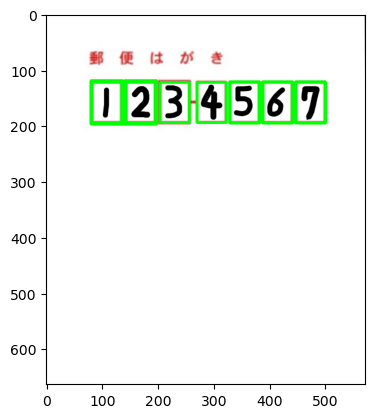

In [22]:
# detect_postcode.pyでは、「if __name__ == '__main__':」の部分
result, img = detect_postcode("hagaki1.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("detect-postcode.png", dpi=200)
plt.show()

In [23]:
# resultを表示して確認
print(result)

[[80, 119, 57, 78], [140, 119, 58, 78], [204, 122, 52, 72], [270, 122, 52, 72], [328, 121, 54, 74], [387, 121, 54, 74], [446, 121, 54, 74]]


## 2-3. 数字部分の画像を切り出そう

In [24]:
# 郵便番号部分の検出（上と同じ）
result, img = detect_postcode('hagaki1.png')

In [25]:
# ループ処理
# 画像データを保存するリスト
imgs = []
for box in result:
    x,y,w,h = box #各値に分ける
     # スライスを使用して、少し内側(±8)をカット
     # xとyの順番に注意する！
    img_cut = img[y+8:y+h-8, x+8:x+w-8]
    imgs.append(img_cut)

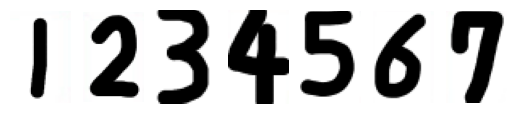

In [26]:
# 画像を表示して確認
# imgsの中身だけでなく、indexも使用したいので、enumerate()を使用
for i, img in enumerate(imgs):
    plt.subplot(1, len(imgs), i+1) #1行7列の領域のi+1番目に表示する
    plt.axis("off") # 軸を表示しない
    plt.imshow(img)